  Training: Dataset[93000 images, size 256, from 62 labels]
Validation: Dataset[620 images, size 256, from 62 labels]


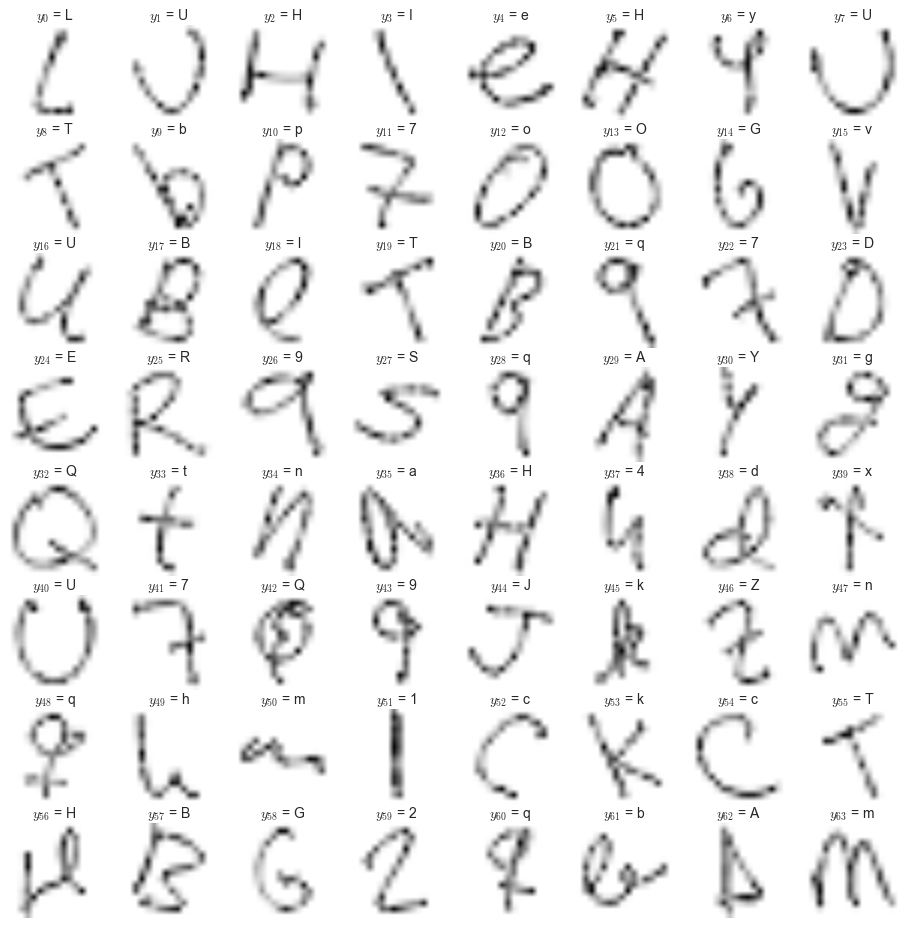

In [1]:
# Import useful packages, load up & show the data

%matplotlib inline
import dlt
import numpy as np
import seaborn as sns

import chainer as C
import chainer.functions as F
import chainer.links as L


train = dlt.load_hdf5('data/train/train.hdf')
valid = dlt.load_hdf5('data/train/valid.hdf')
#test = dlt.load_hdf5('???')

print("  Training: %s" % train)
print("Validation: %s" % valid)
train.show()

#print ( train.vocab[train.y[1]], train.x[1])


In [5]:
# TODO - train a model

import chainer as C
print(train.vocab)
print(train.y[0], train.x[0])

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
21 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.87818038e-01   5.70949852e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.22842121e-01   7.00836897e-01   0.00000000e+00   

In [2]:

# define model here
#netw = C.links.Linear(256, 128)

class MyChain(C.Chain):
    def __init__(self):
        super(MyChain, self).__init__(
            l1=L.Linear(256, 512),
            l2=L.Linear(512, 128),
            l3=L.Linear(128, 62)
        )

    def __call__(self, x):
        f = self.l1(x)
        h = self.l2(C.functions.tanh(f))
        return self.l3(h)
    
    def run(self, xx, yy):
        pp = self(xx)
        loss = C.functions.softmax_cross_entropy(pp, yy)
        acc = C.functions.accuracy(pp, yy)
        
        return loss, acc
    
netw = MyChain()

In [3]:
# First choose an optimizer & set it up (only done once)
opt = C.optimizers.SGD()   # start with SGD, but I'd recommend trying Adam soon!
opt.use_cleargrads()
opt.setup(netw)

print(len(train.x))

# Run the network, and take a single small gradient-based step
x = C.Variable(train.x[:128].astype(np.float32))   # shape (N, 256)
y = C.Variable(train.y[:128])   # shape (N,) integers
netw.cleargrads()     # clear gradients
#p = netw(x)           # run the model to get predictions (shape (N, 62))
                      # (this should include any other functions you're using)
#loss = C.functions.softmax_cross_entropy(p, y)
loss, acc = netw.run(x,y)

loss.backward()       # compute gradients
opt.update()          # update parameters
print(loss.data)      # how well are we doing, smaller is better

93000
4.154644966125488


0 loss= 3.6870408058166504 acc= 0.1484375 vloss= 3.6389572620391846 vacc= 0.2241935431957245
1 loss= 3.065661907196045 acc= 0.2578125 vloss= 2.9463605880737305 vacc= 0.3467741906642914
2 loss= 2.555323600769043 acc= 0.359375 vloss= 2.3909943103790283 vacc= 0.42580646276474
3 loss= 2.249392032623291 acc= 0.390625 vloss= 2.06980299949646 vacc= 0.48064514994621277
4 loss= 2.07033371925354 acc= 0.421875 vloss= 1.886766791343689 vacc= 0.5
5 loss= 1.9539695978164673 acc= 0.4453125 vloss= 1.7699962854385376 vacc= 0.5161290168762207
6 loss= 1.8703986406326294 acc= 0.4609375 vloss= 1.6879589557647705 vacc= 0.5338709950447083
7 loss= 1.805957317352295 acc= 0.4609375 vloss= 1.6269179582595825 vacc= 0.5548387169837952
8 loss= 1.7533142566680908 acc= 0.4921875 vloss= 1.5797643661499023 vacc= 0.5693548321723938
9 loss= 1.7084730863571167 acc= 0.4921875 vloss= 1.542352318763733 vacc= 0.5919354557991028


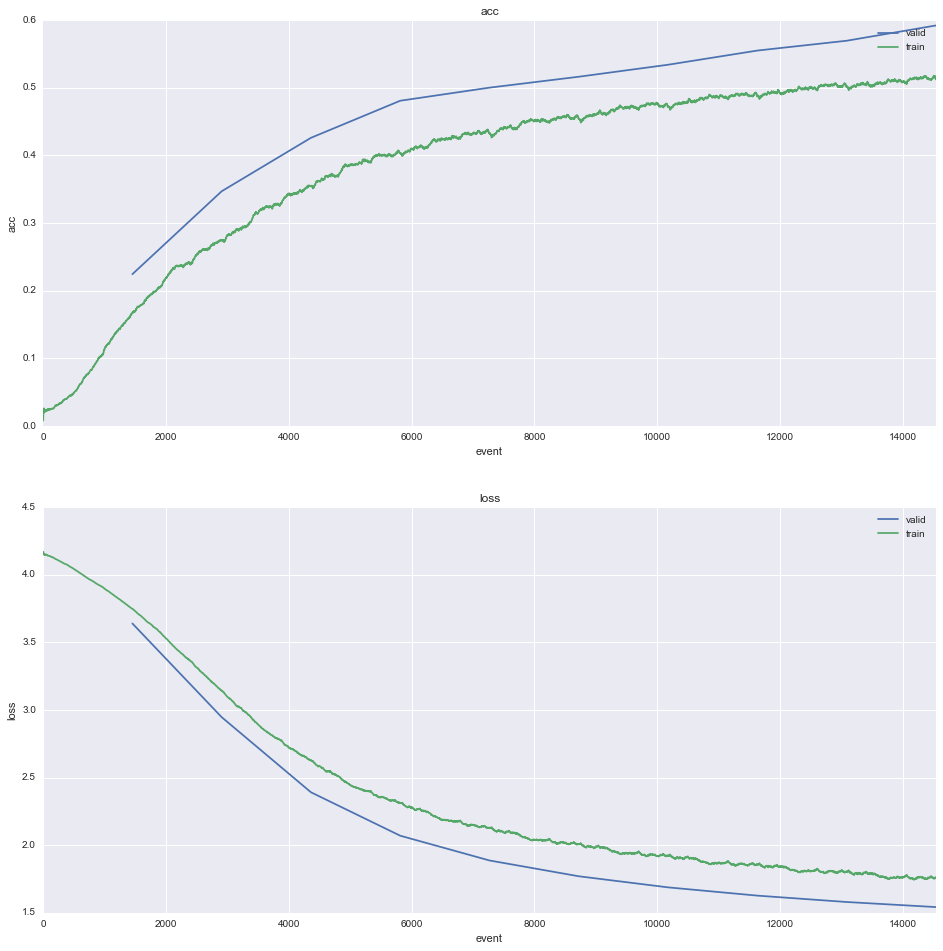

In [4]:
netw = MyChain()

# First choose an optimizer & set it up (only done once)
opt = C.optimizers.SGD()   # start with SGD, but I'd recommend trying Adam soon!
opt.use_cleargrads()
opt.setup(netw)

netw.cleargrads()

steps = 10
w = 128
maxrange = len(train.x)//128

log = dlt.Log()

for st in range(steps):
    for i in range(0,maxrange):
        # Run the network, and take a single small gradient-based step
        x = C.Variable(train.x[i*w:i*w+w].astype(np.float32))   # shape (N, 256)
        y = C.Variable(train.y[i*w:i*w+w])   # shape (N,) integers
        netw.cleargrads()     # clear gradients
        p = netw(x)           # run the model to get predictions (shape (N, 62))
                              # (this should include any other functions you're using)
        loss, acc = netw.run(x, y)

        log.add('loss', 'train', float(loss.data))
        log.add('acc', 'train', float(acc.data))

        acc.backward()
        loss.backward()       # compute gradients
        opt.update()          # update parameters
        
    X = C.Variable(valid.x.astype(np.float32))
    Y = C.Variable(valid.y)
    ls, ac = netw.run(X, Y)

    log.add('loss', 'valid', float(ls.data))
    log.add('acc', 'valid', float(ac.data))

    print(st, "loss=", loss.data, "acc=", acc.data, "vloss=", ls.data, "vacc=", ac.data)

log.show()


In [7]:
for i in range(10,50):
    x = C.Variable(train.x[i:i+1].astype(np.float32))   # shape (N, 256)
    y = C.Variable(train.y[i:i+1])   # shape (N,) integers
    p = netw(x)

    print(y.data, np.argmax(p.data), train.vocab[y.data], train.vocab[np.argmax(p.data)])

[51] 51 ['p'] p
[7] 7 ['7'] 7
[50] 24 ['o'] O
[24] 24 ['O'] O
[16] 16 ['G'] G
[57] 31 ['v'] V
[30] 56 ['U'] u
[11] 11 ['B'] B
[47] 40 ['l'] e
[29] 29 ['T'] T
[11] 11 ['B'] B
[52] 9 ['q'] 9
[7] 7 ['7'] 7
[13] 13 ['D'] D
[14] 14 ['E'] E
[27] 27 ['R'] R
[9] 9 ['9'] 9
[28] 54 ['S'] s
[52] 9 ['q'] 9
[10] 10 ['A'] A
[34] 34 ['Y'] Y
[42] 42 ['g'] g
[26] 26 ['Q'] Q
[55] 55 ['t'] t
[49] 10 ['n'] A
[36] 36 ['a'] a
[17] 17 ['H'] H
[4] 4 ['4'] 4
[39] 39 ['d'] d
[59] 33 ['x'] X
[30] 30 ['U'] U
[7] 7 ['7'] 7
[26] 26 ['Q'] Q
[9] 9 ['9'] 9
[19] 19 ['J'] J
[46] 46 ['k'] k
[35] 35 ['Z'] Z
[49] 56 ['n'] u
[52] 9 ['q'] 9
[43] 43 ['h'] h


0 loss= 1.257636308670044 acc= 0.578125 vloss= 1.0785638093948364 vacc= 0.6822580695152283
1 loss= 0.9730159640312195 acc= 0.640625 vloss= 0.9272879958152771 vacc= 0.7177419066429138
2 loss= 0.8089488744735718 acc= 0.703125 vloss= 0.8665664196014404 vacc= 0.727419376373291
3 loss= 0.6930049657821655 acc= 0.7734375 vloss= 0.8602193593978882 vacc= 0.7193548679351807
4 loss= 0.6201616525650024 acc= 0.7890625 vloss= 0.8586912155151367 vacc= 0.7112902998924255
5 loss= 0.5611463785171509 acc= 0.796875 vloss= 0.8634507656097412 vacc= 0.7145161032676697
6 loss= 0.5191360712051392 acc= 0.8046875 vloss= 0.8793330788612366 vacc= 0.7096773982048035
7 loss= 0.47240957617759705 acc= 0.8046875 vloss= 0.8989295363426208 vacc= 0.7129032015800476
8 loss= 0.44007307291030884 acc= 0.8359375 vloss= 0.9252006411552429 vacc= 0.7080644965171814
9 loss= 0.4240514636039734 acc= 0.8359375 vloss= 0.9407433271408081 vacc= 0.7096773982048035


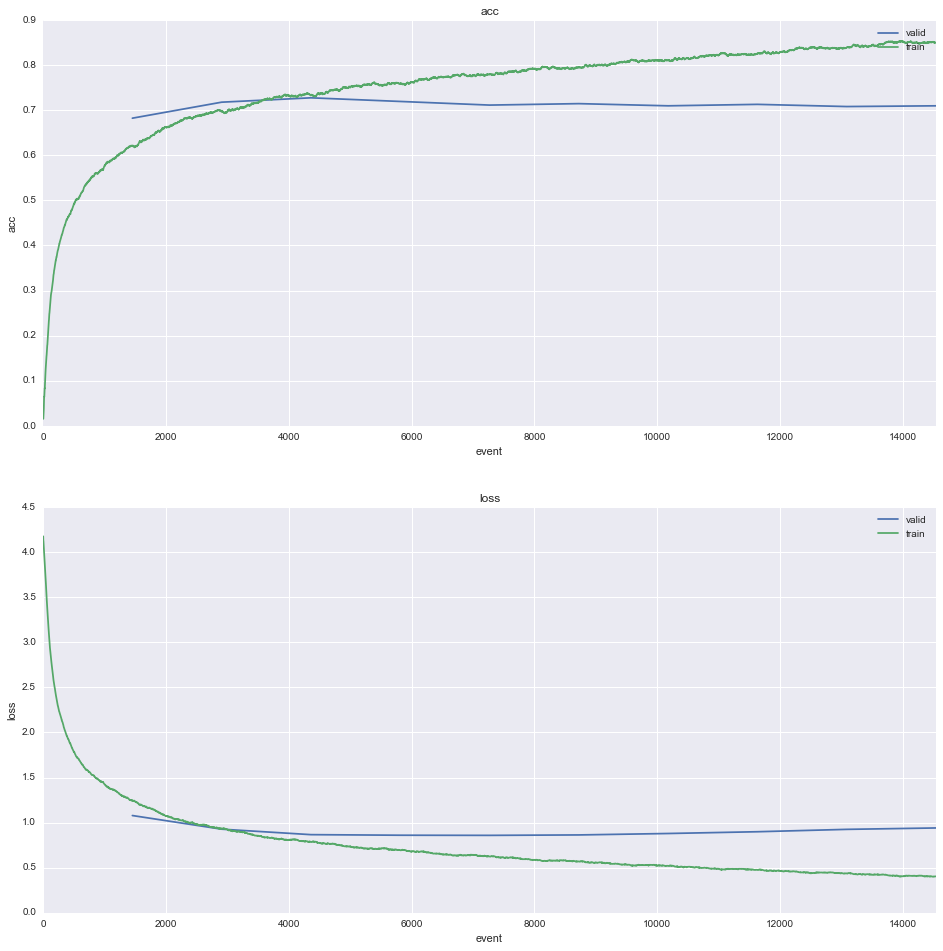

In [8]:
# define model here
#netw = C.links.Linear(256, 128)

class MyChain(C.Chain):
    def __init__(self):
        super(MyChain, self).__init__(
            l1=L.Linear(256, 512),
            l2=L.Linear(512, 128),
            l3=L.Linear(128, 62)
        )

    def __call__(self, x):
        f = self.l1(x)
        h = self.l2(C.functions.tanh(f))
        return self.l3(C.functions.tanh(h))
    
    def run(self, xx, yy):
        pp = self(xx)
        loss = C.functions.softmax_cross_entropy(pp, yy)
        acc = C.functions.accuracy(pp, yy)
        
        return loss, acc

netw = MyChain()

# First choose an optimizer & set it up (only done once)
opt = C.optimizers.AdaDelta()   # start with SGD, but I'd recommend trying Adam soon!
opt.use_cleargrads()
opt.setup(netw)

netw.cleargrads()

steps = 10
w = 128
maxrange = len(train.x)//128

log = dlt.Log()

for st in range(steps):
    for i in range(0,maxrange):
        # Run the network, and take a single small gradient-based step
        x = C.Variable(train.x[i*w:i*w+w].astype(np.float32))   # shape (N, 256)
        y = C.Variable(train.y[i*w:i*w+w])   # shape (N,) integers
        netw.cleargrads()     # clear gradients
        p = netw(x)           # run the model to get predictions (shape (N, 62))
                              # (this should include any other functions you're using)
        loss, acc = netw.run(x, y)

        log.add('loss', 'train', float(loss.data))
        log.add('acc', 'train', float(acc.data))

        acc.backward()
        loss.backward()       # compute gradients
        opt.update()          # update parameters
        
    X = C.Variable(valid.x.astype(np.float32))
    Y = C.Variable(valid.y)
    ls, ac = netw.run(X, Y)

    log.add('loss', 'valid', float(ls.data))
    log.add('acc', 'valid', float(ac.data))

    print(st, "loss=", loss.data, "acc=", acc.data, "vloss=", ls.data, "vacc=", ac.data)

log.show()


In [6]:
# Demo - try your classifier 

def classify(img):
    print("TODO - classify img, shape %s" % img.shape)
    return train.vocab[np.argmax(netw(C.Variable(img.reshape(1,-1))).data)]

dlt.CustomInput(classify)